# Linear Regression - Connect the dots

A fundamental concept in machine learning is 'linear regression'.  The concept is actually pretty intuitive, especially if we work in 2-D:

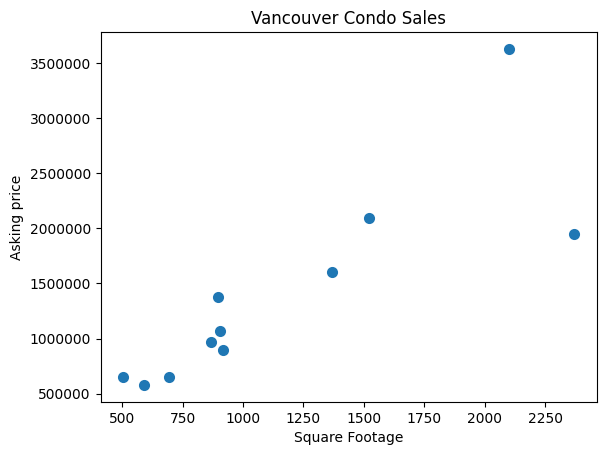

In [27]:
# some housing price data from Vancouver
import matplotlib.pyplot as plt
import pandas as pd

condo_data = pd.read_csv("../data/vancouver_condos.csv")

def draw_scatter():
    plt.scatter(condo_data["sq_footage"], condo_data["sale_price"], linewidth=2.0)
    plt.title("Vancouver Condo Sales")
    plt.xlabel("Square Footage")
    plt.ylabel("Asking price")
    plt.ticklabel_format(style="plain")
    plt.show()

draw_scatter()

That relationship looks pretty linear.  It would seem reasonable then for us to draw a line of best fit on the data, and use that to infer the price of a condo based on its square footage:

fit the data to a function: sale_price = 1246.51 (square_footage) + -37866.33


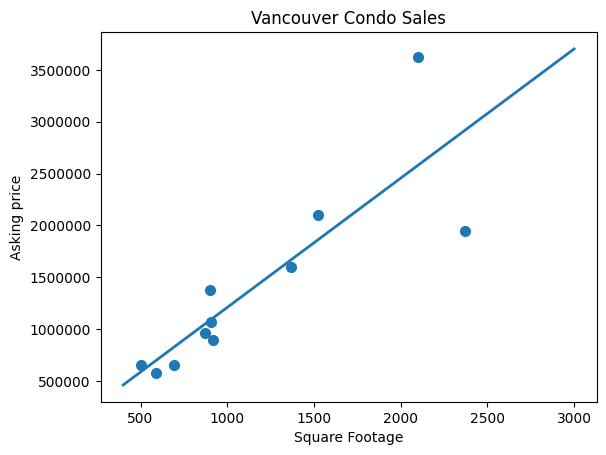

In [223]:
import numpy as np
m, b = np.polyfit(condo_data["sq_footage"], condo_data["sale_price"], 1)
# ie. we fit this to a line of slope 'm' and intercept b
print(f"fit the data to a function: sale_price = {round(m, 2)} (square_footage) + {round(b, 2)}")

def linear_predict(m, b, sq_footage: float) -> float:
    return m * sq_footage + b

plt.plot(
    [400, 3000],
    [linear_predict(m, b, 400), linear_predict(m, b, 3000)],
    linewidth=2,
    linestyle="-",
)
draw_scatter()

This is basically what's done when we fit a 'linear layer' from Pytorch to the same data:

In [213]:
import torch
import torch.nn
import torch.optim

class LinearRegressionModule(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModule, self).__init__()
        # one 'slope' feature, and one 'bias' feature
        self.linear_layer = torch.nn.Linear(in_features=1, out_features=1, bias=True)
        return

    def forward(self, x):
        return self.linear_layer(x)


model = LinearRegressionModule()
loss_fn = torch.nn.MSELoss()
learning_rate = 0.000001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [214]:
training_data = [
    (
        torch.tensor([row["sq_footage"]], dtype=torch.float32),
        torch.tensor([row["sale_price"]], dtype=torch.float32)
    ) for _, row in condo_data.iterrows()
]

In [215]:
for sq_footage, actual_sale_price in training_data:
    optimizer.zero_grad()
    predicted_price = model(sq_footage)
    print("predicted price:", predicted_price)
    loss = loss_fn(predicted_price, actual_sale_price)
    print("loss:", loss)
    loss.backward()
    optimizer.step()


predicted price: tensor([1068.7371], grad_fn=<ViewBackward0>)
loss: tensor(4.3971e+12, grad_fn=<MseLossBackward0>)
predicted price: tensor([8740012.], grad_fn=<ViewBackward0>)
loss: tensor(5.0981e+13, grad_fn=<MseLossBackward0>)
predicted price: tensor([-11945022.], grad_fn=<ViewBackward0>)
loss: tensor(1.6936e+14, grad_fn=<MseLossBackward0>)
predicted price: tensor([9534127.], grad_fn=<ViewBackward0>)
loss: tensor(7.4662e+13, grad_fn=<MseLossBackward0>)
predicted price: tensor([-3782318.7500], grad_fn=<ViewBackward0>)
loss: tensor(1.9637e+13, grad_fn=<MseLossBackward0>)
predicted price: tensor([1660536.6250], grad_fn=<ViewBackward0>)
loss: tensor(8.3789e+10, grad_fn=<MseLossBackward0>)
predicted price: tensor([4352681.5000], grad_fn=<ViewBackward0>)
loss: tensor(5.2516e+11, grad_fn=<MseLossBackward0>)
predicted price: tensor([-871915.7500], grad_fn=<ViewBackward0>)
loss: tensor(5.0666e+12, grad_fn=<MseLossBackward0>)
predicted price: tensor([1548140.3750], grad_fn=<ViewBackward0>)
los

In [216]:
print(model.linear_layer.weight)
print(model.linear_layer.bias)

Parameter containing:
tensor([[855.6586]], requires_grad=True)
Parameter containing:
tensor([8.5600], requires_grad=True)


In [100]:
model(torch.tensor([500.0]))

applying to: tensor([500.])


tensor([67.6019], grad_fn=<ViewBackward0>)

In [221]:
for _ in range(100):
    for sq_footage, actual_sale_price in training_data:
        optimizer.zero_grad()
        predicted_price = model(sq_footage)
        loss = loss_fn(predicted_price, actual_sale_price)
        loss.backward()
        optimizer.step()

fit the data to a function: sale_price = 2325.85 (square_footage) + -20232.43


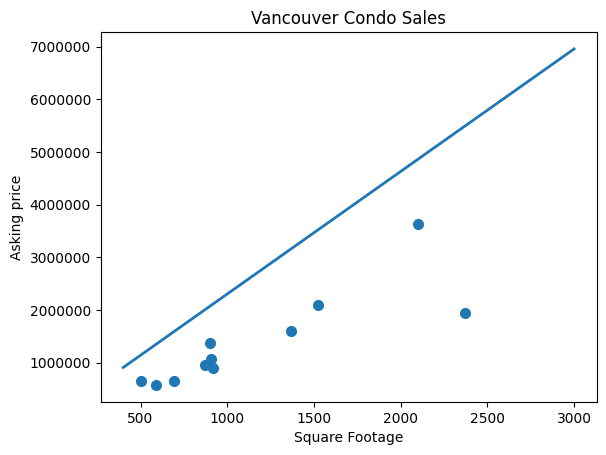

In [224]:
m = model.linear_layer.weight.item()
b = model.linear_layer.bias.item()
print(f"fit the data to a function: sale_price = {round(m, 2)} (square_footage) + {round(b, 2)}")
plt.plot(
    [400, 3000],
    [linear_predict(m, b, 400), linear_predict(m, b, 3000)],
    linewidth=2,
    linestyle="-",
)
draw_scatter()